In [200]:
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller

In [201]:
df = pd.read_csv('spending_data.csv')
# Year needs to be finished to have comprehensive data
df = df[df['Date'] < 2022]
yearly_spending = df.groupby('Date').sum()['Spending']
yearly_spending = pd.DataFrame(yearly_spending).reset_index()

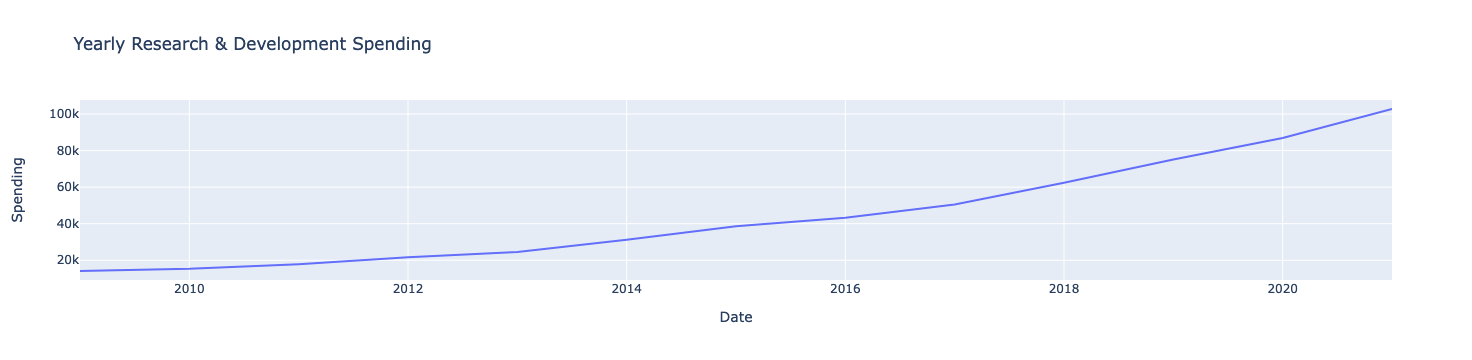

In [202]:
fig = px.line(yearly_spending, x="Date", y="Spending", title='Yearly Research & Development Spending')
fig.show()

## Forecasting

There is an upwards trend to the data.

There is no seasonality involved

<AxesSubplot:>

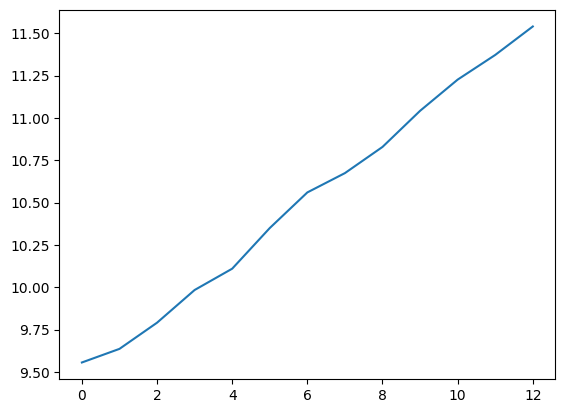

In [203]:
# Taking the log, gives us the below chart
# Better for linear models
# Assuming no autocorrelation between 
np.log(yearly_spending['Spending']).plot()

In [204]:
yearly_spending['Spending'] = np.log(yearly_spending['Spending'])

X = np.array(yearly_spending['Date']).reshape(-1,1)
y = yearly_spending['Spending']
reg = LinearRegression().fit(X, y)

In [205]:
X_new = np.append(X, [[2022], [2023], [2024], [2025]]).reshape(-1, 1)

In [206]:
new_df = pd.DataFrame()
new_df['Date'] = X_new.reshape(1, -1)[0]
new_df['Predicted'] = reg.predict(X_new)

In [207]:
df = new_df.merge(yearly_spending, how='left')

In [208]:
df['Predicted'] = np.exp(df['Predicted'])
df['Spending'] = np.exp(df['Spending'])

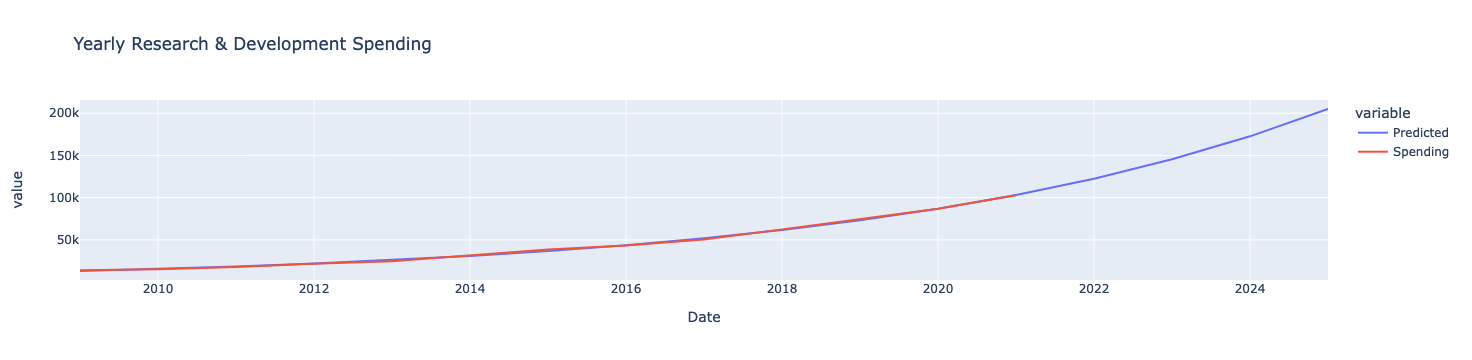

In [209]:
fig = px.line(df, x="Date", y=df.columns[1:], title='Yearly Research & Development Spending')
fig.show()

In [215]:
reg.score(X, y)

0.9972571567279296

In [227]:
# Calculating a confidence interval
# Alpha value = 0.1
# Two-tailed interval
# divide alpha by 2 = 0.05
# Critical values that corresponds to that alpha value
# t-score = 2.2 (t dist might be better due to the lower sample sizes, ~10 degrees of freedom)
std = np.std(df['Spending'].dropna())

In [237]:
mean = df['Spending'].dropna().mean()
upper_bound = mean + 2.2 * (std/np.sqrt(len(df['Spending'].dropna())))
lower_bound = mean - 2.2 * (std/np.sqrt(len(df['Spending'].dropna())))

In [242]:
upper_bound

61946.8249534793

In [243]:
df['upper_bound'] = df['Predicted'] + upper_bound
df['lower_bound'] = df['Predicted'] - lower_bound

In [244]:
df

,Date,Predicted,Spending,upper_bound,lower_bound
0,2009,13128.389697,14129.0,75075.214650,-14812.477657
1,2010,15588.832229,15311.0,77535.657183,-12352.035125
2,2011,18510.395858,17871.0,80457.220811,-9430.471496
3,2012,21979.501080,21677.0,83926.326034,-5961.366274
4,2013,26098.764794,24585.0,88045.589747,-1842.102560
5,2014,30990.035728,31256.0,92936.860681,3049.168374
6,2015,36797.998756,38571.0,98744.823710,8857.131402
7,2016,43694.454707,43231.0,105641.279660,15753.587352
8,2017,51883.402267,50460.0,113830.227221,23942.534913
9,2018,61607.072314,62451.0,123553.897267,33666.204959
